<a href="https://colab.research.google.com/github/Sovarna/Phyton-Assignement/blob/main/Phyton_2nd_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-25 16:03:16--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-25 16:03:17--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  50.4MB/s    in 49s     

2023-05-25 16:04:06 (16.

In [ ]:
# sqlite 3 library is used to establish connection with the database and execute data
import sqlite3
# Pandas library is used for the analysis of data and processing.
import pandas as pd


In [ ]:
# This function is done to connect with the database
connect = sqlite3.connect("enron.db")

In [ ]:
# Cursor is used to retrive data and run queries using sql.
cur = connect.cursor()

In [ ]:
# SQl query used to extract a specific data from the database.
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
# The cursor is used to generate the sql statement.
cur.execute(sql)

# Fetching the rows of the query
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
# Executing the result from the sql query displaying name from the table dataframe 
table_df = pd.read_sql_query(sql,connect)
table_df

,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


In [ ]:
# The Function PRAGMA is use to extract the schema database of employeelist from the table
sql2 = """
PRAGMA table_info('employeelist');
"""
# Generate employeelist from sql2 statement
cur.execute(sql2)

#Fetching the rows of sql2 query
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
#Executing the result from the sql2 query displaying employeelist dataframe from the table_info 
employee_df = pd.read_sql_query(sql2,connect)
employee_df

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [ ]:
# SQl query used to extract all employeelist data from the database with a limit of 11 information
SQL = """
SELECT * From Employeelist
LIMIT 11;

"""
# Generate employeelist sql query statement
cur.execute(SQL)

In [ ]:








#Executing sql query by displaying employeelist into a dataframe
employee_df = pd.read_sql_query(SQL,connect)
employee_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
5,6,Mark,Taylor,mark.e.taylor@enron.com,mark.taylor@enron.com,e.taylor@enron.com,,taylor-m,Employee
6,7,Theresa,Staab,theresa.staab@enron.com,theresa_staab@enron.com,tstaab@enron.com,,staab-t,Employee
7,8,Susan,Pereira,susan.w.pereira@enron.com,w..pereira@enron.com,susan.peireira@enron.com,,pereira-s,Employee
8,9,Stephanie,Panus,stephanie.panus@enron.com,,,,panus-s,Employee
9,10,Phillip,Allen,phillip.k.ellen@enron.com,phillip.allen@enron.com,k..allen@enron.com,,allen-p,Manager


In [ ]:
# To extract the database schema of message from table_info.
sql3 = """
PRAGMA table_info('message');
"""
# Generate message from sql3 statement
cur.execute(sql3)

#Fetching the rows of sql3 query
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#Executing the result from the sql3 query displaying message dataframe from the table_info 
message_df = pd.read_sql_query(sql3,connect)
message_df

,cid,name,type,notnull,dflt_value,pk
0,0,mid,INTEGER,1,'0',1
1,1,sender,VARCHAR(127),1,'',0
2,2,date,DATETIME,0,None,0
3,3,message_id,VARCHAR(127),0,None,0
4,4,subject,TEXT,0,None,0
5,5,body,TEXT,0,None,0
6,6,folder,VARCHAR(127),1,'',0


In [ ]:
# SQl query used to extract all message data from the database with a limit of 11 information 
SQL = """
SELECT * FROM message 
Limit 11;
"""
# Generate message sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying message into a dataframe
message_df = pd.read_sql_query(SQL,connect)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
5,57,foothi19@idt.net,2000-08-25 02:09:00,<31680362.1075863730221.JavaMail.evans@thyme>,WPTF Friday Credo Veritas Burrito,"THE FRIDAY BURRITO""...more fun than a fortune ...",Robert_Badeer_Aug2000Notes FoldersNotes inbox
6,58,enron.announcements@enron.com,2000-06-21 11:46:00,<25532011.1075863606453.JavaMail.evans@thyme>,SAP ID - Here it is!!!!!,The following SAP ID and Password allows you t...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
7,59,christopher.calger@enron.com,2000-06-27 08:58:00,<23318125.1075863606431.JavaMail.evans@thyme>,Set of Graphs,---------------------- Forwarded by Christophe...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
8,60,christian.yoder@enron.com,2000-07-25 08:14:00,<25889429.1075863606409.JavaMail.evans@thyme>,Block Forward Financial Trades,Legal has been assessing the risks of doing bl...,Robert_Badeer_Aug2000Notes FoldersNotes inbox
9,61,carla.hoffman@enron.com,2000-07-27 10:27:00,<9486701.1075863606387.JavaMail.evans@thyme>,Block forwards,Positions have been reduced as follows for Aug...,Robert_Badeer_Aug2000Notes FoldersNotes inbox


In [ ]:
# To extract the database schema of Recipient from table_info.
sql4 = """
PRAGMA table_info('Recipientinfo');
"""
# Generate Recipientinfo from sql4 statement
cur.execute(sql4)

#Fetching the rows of sql4 query
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#Executing the result from the sql4 query displaying Recipientinfo dataframe from the table_info 
Recipientinfo_df = pd.read_sql_query(sql4,connect)
Recipientinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,rtype,TEXT,0,None,0
3,3,rvalue,VARCHAR(127),0,None,0
4,4,dater,DATETIME,0,None,0


In [ ]:
# SQl query used to extract all Recipientinfo data from the database with a limit of 11 information 
SQL = """
SELECT * FROM Recipientinfo
limit 11;
"""
# Generate Recipientinfo sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying Recipientinfo into a  dataframe
Recipientinfo_df = pd.read_sql_query(SQL,connect)
Recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
5,72,56,TO,ec.communications@enron.com,None
6,73,57,TO,charlotte@wptf.org,None
7,74,58,TO,sap.mailout@enron.com,None
8,75,59,TO,robert.badeer@enron.com,None
9,76,60,TO,tim.belden@enron.com,None


In [ ]:
# To extract the database schema of Referenceinfo from table_info.
sql5 = """
PRAGMA table_info('Referenceinfo');
"""
# Generate Referenceinfo from sql5 statement
cur.execute(sql5)

#Fetching the rows of sql5 query
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [ ]:
#Executing the result from the sql5 query displaying Referenceinfo dataframe from the table_info 
Referenceinfo_df = pd.read_sql_query(sql5,connect)
Referenceinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rfid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,reference,TEXT,0,None,0


In [ ]:
# SQl query used to extract all Recipientinfo data from the database with a limit of 11 information 
SQL = """
SELECT * FROM Referenceinfo
Limit 11;
"""

# Generate Referenceinfo sql query statement
cur.execute(SQL)

In [ ]:
#Executing sql query by displaying Referenceinfo into a dataframe
Referenceinfo_df = pd.read_sql_query(SQL,connect)
Referenceinfo_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
5,15,846,"From: \tRangel, Ina Sent:\tThursday, March 07..."
6,16,847,"From: \tGrigsby, Mike Sent:\tFriday, March 08..."
7,17,848,"From: \tGrigsby, Mike Sent:\tFriday, March 08..."
8,18,849,"From: \tRangel, Ina Sent:\tThursday, March 07..."
9,19,851,"From: \tHyatt, Kevin Sent:\tWednesday, July 2..."


### EMAIL TRAFFIC OVER Time
Count of volume send over time

In [ ]:
# Matplotlib is a library used for plotting graphs and visualisation 
import matplotlib.pyplot as plt

# Seaborn library is used in accordance to the matplotlib to have more appealing diagrams.
import seaborn as sns

In [ ]:
# SQl query used to extract date from the message dataframe.
SQL = """
SELECT date FROM message
"""
# Generate the sql query statement by reading and displaying date form the message dataframe
message_df = pd.read_sql_query(SQL,connect)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per day from the message dataframe.
SQL = """

SELECT strftime('%Y-%M-%d',date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per day into a dataframe
Daily_message_df = pd.read_sql_query(SQL, connect)
Daily_message_df


,date,count
0,0001-10-30,2
1,0001-40-18,1
2,0001-11-24,1
3,0001-30-01,1
4,0001-06-06,1
...,...,...
194082,2020-53-29,1
194083,2043-34-28,1
194084,2044-46-02,1
194085,2044-59-04,1


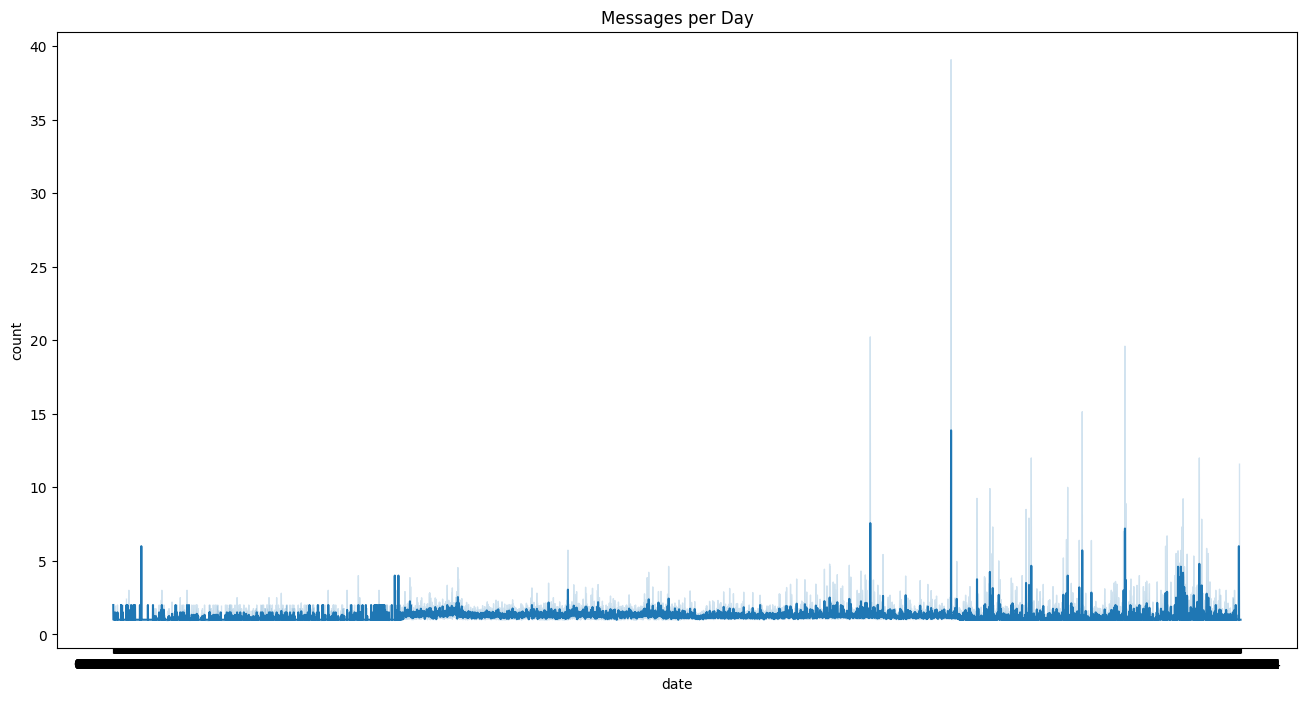

In [ ]:
# Plotting the line graph for emails per day using matplotlib and seaborn
# the x-axis = date and the y-axis = count
# The line graph data is extracted from Daily_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data= Daily_message_df)
plt.title('Messages per Day')
plt.show()

### Messages per day analysis
The line graph illustrates the number of messages Eron was receiving on a daily basis where the x-axis represents the number of days and the y-axis the count of messages. With the two library matplotlib and seaborn the execution of the graph has been successfull with the required information which has been outputted through the use of SQL query that retrieved the number of messages that was obtaining from the Eron database. It can be seen that the lines are compressed and packed which makes it visually diffcult to properly read and comprehend the data displayed. But it helps us to analyse the trend of the line graph where there are more number of messages that Eron is receiving during the lastest days. 


In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per week from the message dataframe.
SQL = """

SELECT strftime('%Y-%M-%w', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""

# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per week into a dataframe
Weekly_message_df = pd.read_sql_query(SQL, connect)
Weekly_message_df

,date,count
0,0001-10-3,2
1,0001-40-1,1
2,0001-11-2,1
3,0001-30-3,1
4,0001-06-1,1
...,...,...
194082,2020-53-2,1
194083,2043-34-1,1
194084,2044-46-6,1
194085,2044-59-1,1


In [ ]:
# Plotting the line graph for emails per day using matplotlib and seaborn
# The x-axis = date, the y-axis = count and title = Messages per week 
# The line graph data is extracted from weekly_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data = Weekly_message_df)
plt.title('Messages per week ')
plt.show()

### Messages per week analysis
The line graph illustrates the number of messages Eron was receciving on a weekly basis where the x axis represents the number of week and the y axis the count of messages. The line graph have extracted the required data from the weekly messages dataframe and showcased it on the above diagram. The execution of the line graph is quite visualing appealing displaying the variation of messages send. They peak at different intervals of time and even have weeks where it had a constant trend. Compared to the daily line graph, it is easier to read and understand the weekly line graph as they are less compacted.

In [ ]:
# SQL query to strftime (to formate date) count and group the number of emails per month from the message dataframe.
SQL = """

SELECT strftime('%Y-%M', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
# Executing the SQL query
cur.execute(SQL)

# Executing sql query by displaying date and count of emails per month into a dataframe
Monthly_message_df = pd.read_sql_query(SQL, connect)
Monthly_message_df

In [ ]:
# Plotting the line graph for emails per month using matplotlib and seaborn
# The x-axis = date, the y-axis = count and title = Messages per month 
# The line graph data is extracted from Monthly_message_df
fig = plt.subplots(figsize=(16,8))
sns.lineplot(x= 'date', y= 'count',data= Monthly_message_df)
plt.title('Messages per month ')
plt.show()

### Messages per month analysis
The line graph illustrates the number of messages Eron was receiving on a montly basis where the X-axs represents the number of month and the Y-axis the count of messages. In this diagram it can be analysed that it is easier to read the illustrated data as the lines can be understand in a more effective way compared to the daily and weekly basis. By grouping the data by date and displaying the monthly messages, it become less complicated and more straightforward to analyse the trend and peaks. For example, we can see that the most number of messages Eron has received was 6.

# 3. Top Senders and Recepients

# Top Sender

In [ ]:
# SQl query used to extract, count, group and order frequent sender data from the message dataframe with a limit of 11 information 
SQL = """

SELECT sender As Sender , COUNT(*) As Number_of_Email FROM message
GROUP BY Sender
ORDER BY COUNT(*) DESC
LIMIT 12
"""
# Executing the SQL query
cur.execute(SQL)

In [ ]:
# Executing sql query by displaying frequent email sender form the dataframe
F_Esenders_df = pd.read_sql(SQL,connect)
F_Esenders_df 

,Sender,Number_of_Email
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


## Bar Chart for Top senders 

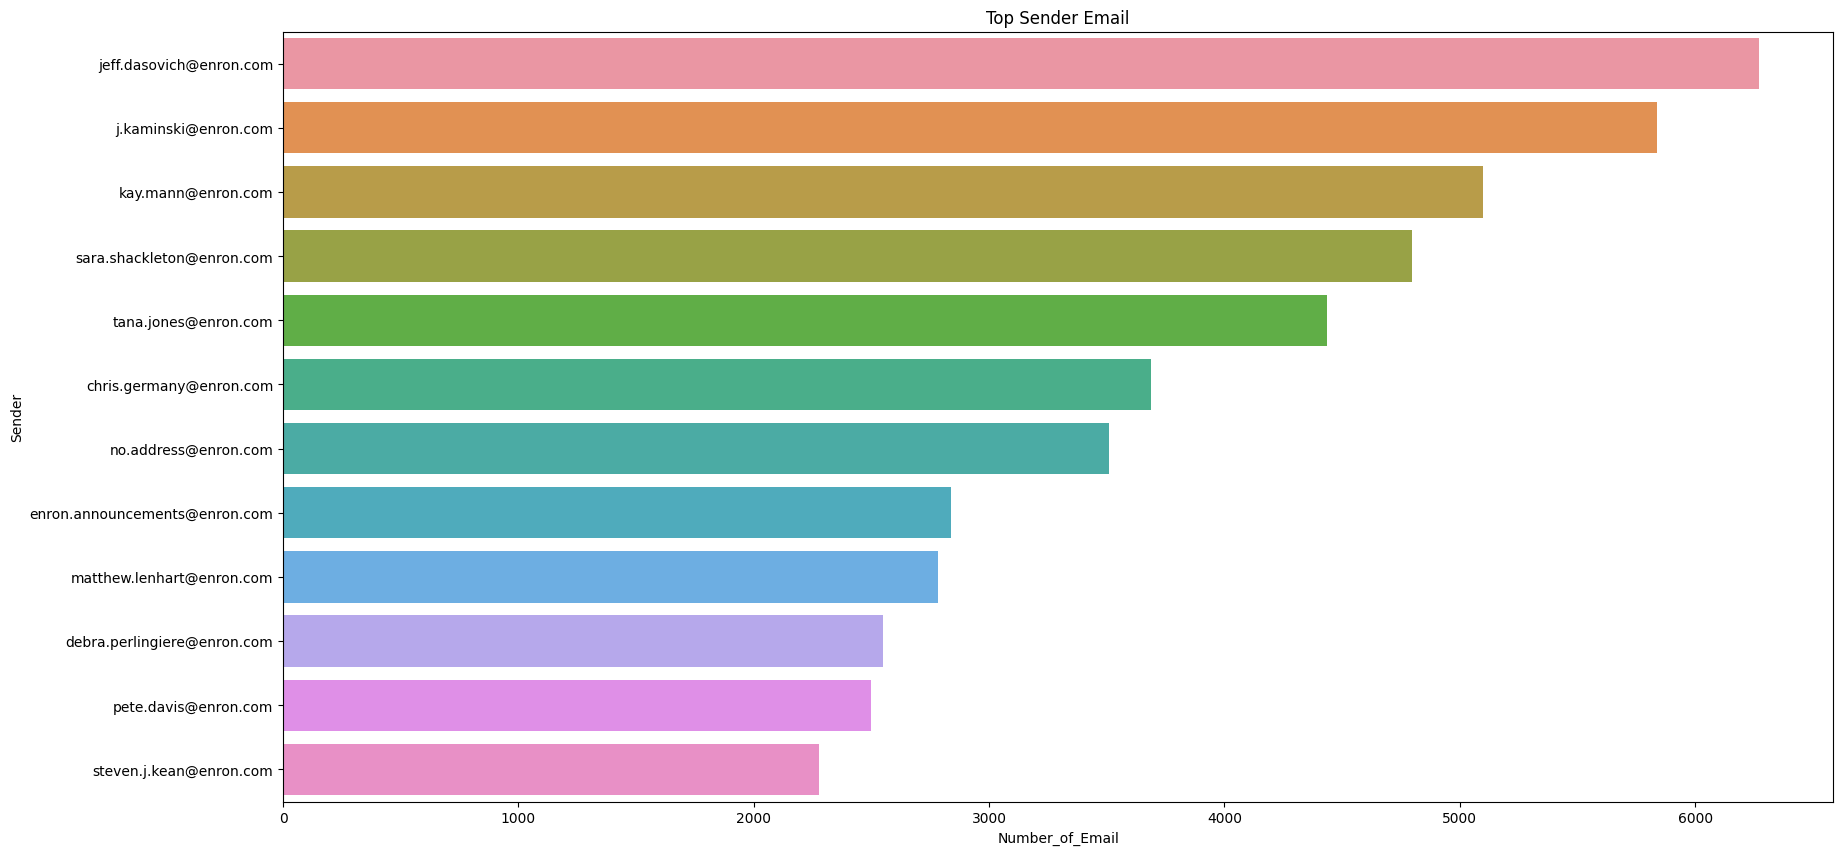

In [ ]:
# Plotting bar chart for top sender using matplotlib and seaborn
# The x-axis = Number_of_Email, the y-axis = sender and title = Top sender Email 
# the bar chart data is extracted from F_Esenders_df
fig = plt.subplots(figsize=(20,10))
sns.barplot(x= 'Number_of_Email', y= 'Sender',data= F_Esenders_df)
plt.title('Top Sender Email')
plt.show()

### Analysis of Top Sender Email
The bar chart illustrates most the frequent senders of email from the Eron database. The x-axis represents the number of email and the y-axis the sender. The bar chart information was executed from the sql query where the the top 12 most frequent senders data have been output from the message dataframe. The use of the seaborn library with matplotlibe have made the diagram more visually attractive and more representable with the colour pallet. The bar chart displays the sender data from the highest number of email to the lowest. It can be analysed that the maximum number of email send was 6000 by jeff.dasovich@eron.com and least is steven.j.kean@eron.com that lies between the 2000 and 3000 email range.

# Top Recipients

In [ ]:
# SQl query used to extract, count, group and order frequent recipient data from the Recipientinfo dataframe with a limit of 11 information 
SQL = """

SELECT rvalue As Recipient, COUNT(*) As Number_of_Email FROM Recipientinfo
GROUP BY Recipient
ORDER BY Number_of_Email  DESC
Limit 12;

"""
# Executing the SQL query
cur.execute(SQL)

In [ ]:
# Executing sql query by displaying frequent recipient email form the dataframe
F_RecipientE_df = pd.read_sql(SQL,connect)
F_RecipientE_df

,Recipient,Number_of_Email
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


## Bar Chart for Top Recipients

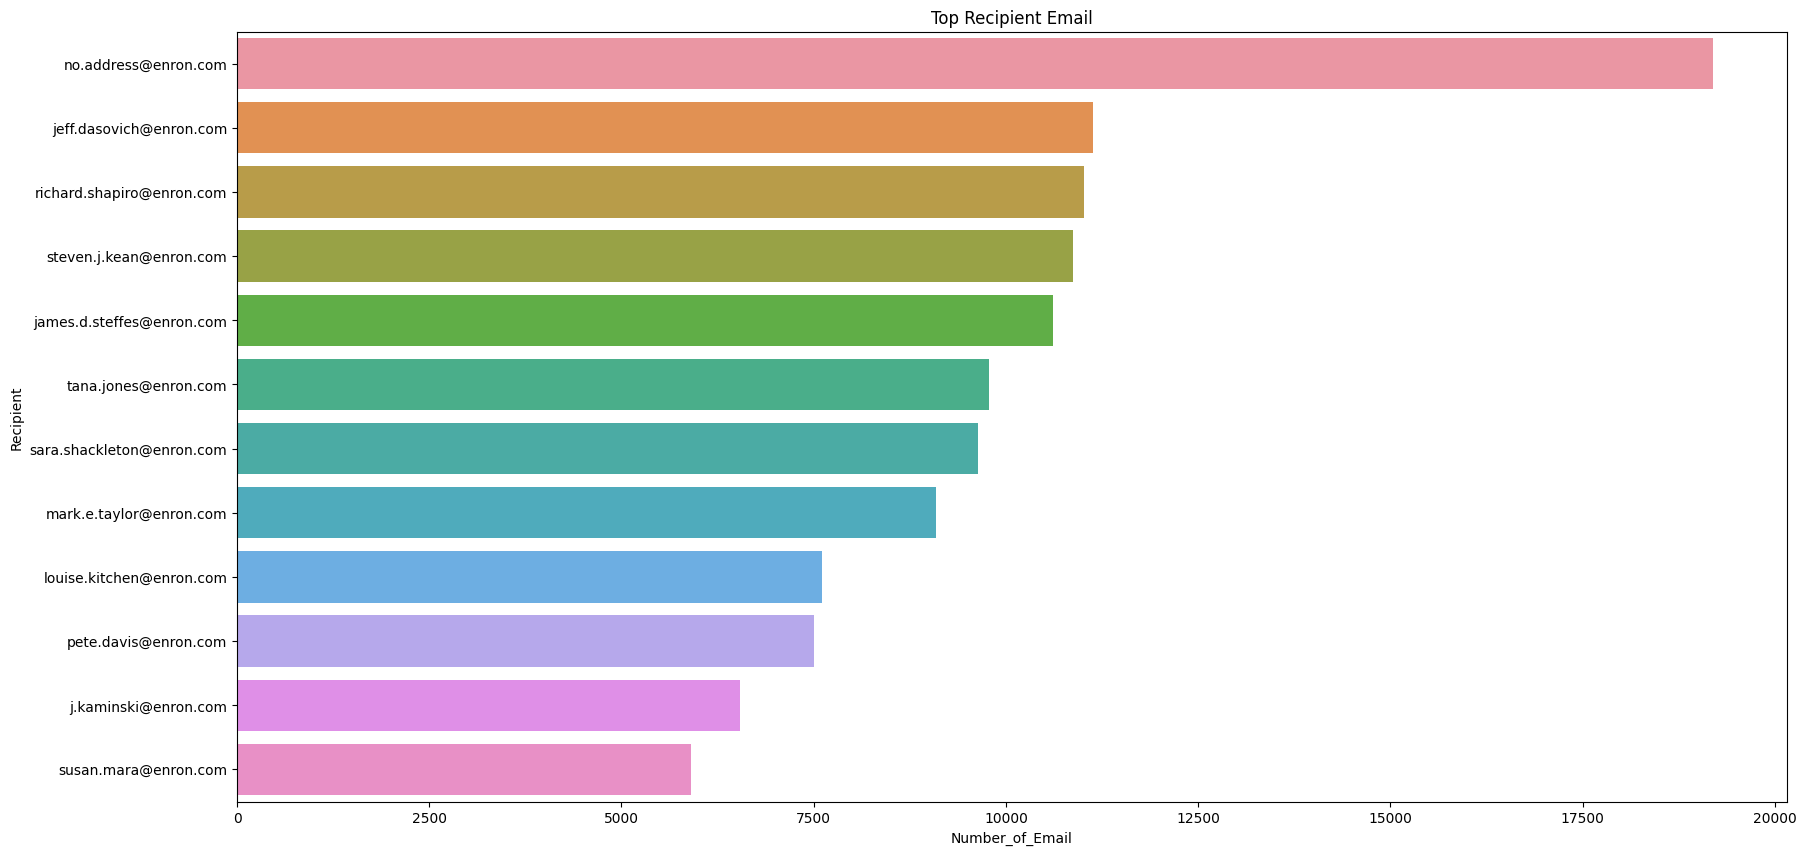

In [ ]:
# Plotting bar chart for Top Recipient Email using matplotlib and seaborn
# The x-axis = Number_of_Email, the y-axis = Recipient and title = Top Recipient Email 
# the bar chart data is extracted from F_RecipientE_df
fig = plt.subplots(figsize=(20,10))
sns.barplot(x= 'Number_of_Email', y= 'Recipient',data= F_RecipientE_df)
plt.title('Top Recipient Email')
plt.show()

### Analysis of Top Recipient Email
The bar chart illustrates the most frequent recipient emails from the Eron database. The x-axis represents the number of email and th y- axis the recipient. The bar chart data was executed from the sql query where selecting and counting the 12 most frequent recipient from the Recipientinfo dataframe and displayed in an ascending order. With the highest recipient no.address@eron.com has a count of almost 20000 emails and the lowest susan.mara@eron.com has an approximate of 6000 emails. The bar chart helps to portrait all the required data where it becomes easier to read and analyse all the data.

## Email Distribution By Recipient Type

In [ ]:
# SQL query to extract, count and group the email distribution of by Recipient type from the Recipientinfo dataframe
SQL = """

SELECT rtype, COUNT (*) AS RecipientType_num FROM Recipientinfo
GROUP BY rtype

"""

# Executing the SQL query
cur.execute(SQL)

In [ ]:
# Executing sql query by displaying rtype email distribution form the Recipientinfo.
rtype_dataframe = pd.read_sql(SQL,connect)
rtype_dataframe

,rtype,RecipientType_num
0,BCC,253713
1,CC,253735
2,TO,1556994


## The Proportion of rtype

In [ ]:
# This function is for the calculation of the proportion of rtype
P_Rtype = rtype_dataframe['RecipientType_num']/rtype_dataframe['RecipientType_num'].sum()

### Pie Chart for the Prorportion of Email by Each rtype

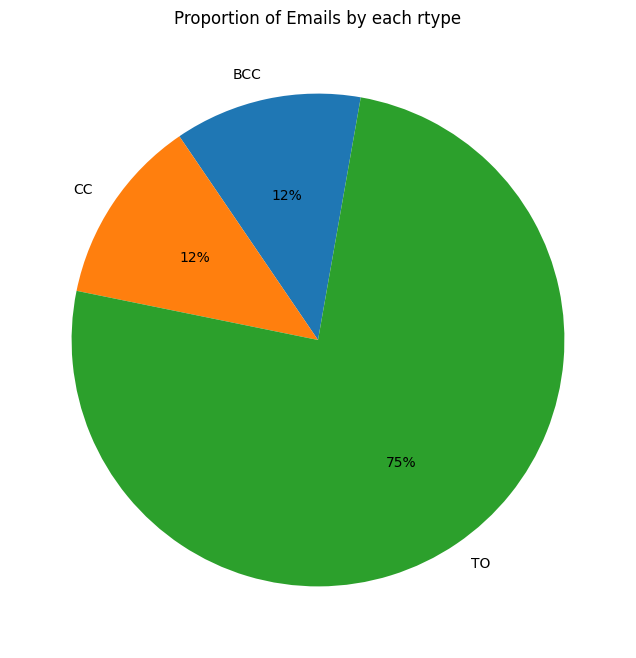

In [ ]:
# Plotting pie chart for Proportion of emails by each rtype using matplotlib and seaborn
# The pie data is extracted from rtype_dataframe 
figure = plt.subplots(figsize=(8,8))
plt.pie(P_Rtype, labels = rtype_dataframe['rtype'], autopct='%.0f%%', startangle=80 )
plt.title('Proportion of Emails by each rtype')
plt.show()

## Pie Chart for the proportion of Emails by each rtype
The pie chart illustrates the proportion of rtype which 'to' represents emails received normally, 'CC' as carbon copy and 'bcc' as blind carbon copy to output the number and the data of the different rtype. A SQL query was conducted and executed from the RecipientInfo dataframe to have the requested information. A calculation of the proportion of rtype was also done to know the percentage of each data. In the pie chart it can be analysed that the 75% of the recipient received their emails normally and the percentage for cc and bcc is the same with the a rate of 17% respectively. The pie chart helps to have a visual representation for the number of recipient email types where it becomes simpler to interpret.

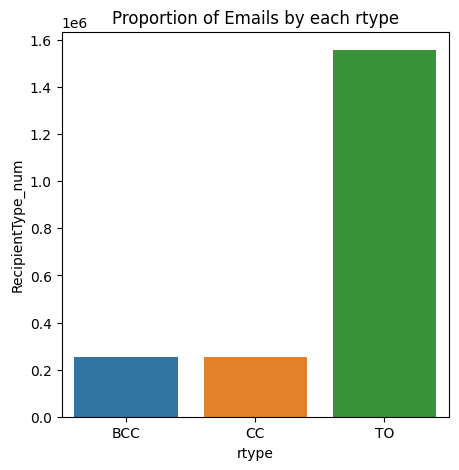

In [ ]:
# Plotting stacked bar for Proportion of emails by each rtype using matplotlib and seaborn
# The stacked bar data is extracted from rtype_dataframe
fig = plt.subplots(figsize=(5,5))
sns.barplot(x= 'rtype', y= 'RecipientType_num', data= rtype_dataframe)
plt.title('Proportion of Emails by each rtype')
plt.show()

The stacked bar chart also displays the proportion of emails for each rtype